In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### California Housing Price Prediction
###### Nishant Banjade

#### Import necessary Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


##### Import Data and get the necessary Information

In [7]:
data=pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Data's Information

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
data.shape

(20640, 10)

#### Data Cleaning 

In [11]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [12]:
df_na=data[data.isna().any(axis=1)]
display(df_na.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


### Build heatmap for observing Null Value

<AxesSubplot:>

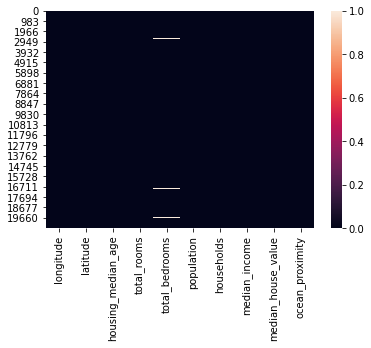

In [13]:
sns.heatmap(data.isna())

#### Describe the total_rooms column

In [14]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')


<AxesSubplot:>

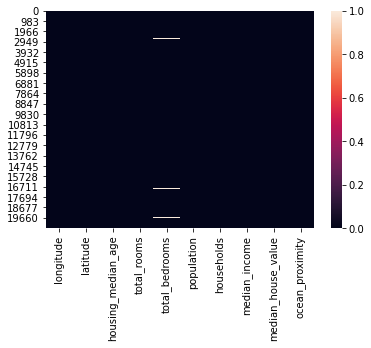

In [15]:
sns.heatmap(data.isna())

In [16]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Feature Engineering

#### Get the Outliers and find possible ways to tackle it
#### Histogram of each features are given

In [17]:
min_thresold, max_thresold = data.median_income.quantile([0.01, 0.97])
min_thresold, max_thresold
data[data.median_income < min_thresold]
data[data.median_income>max_thresold]

data= data[(data.median_income < max_thresold) & (data.median_income >min_thresold)]
data.median_income.describe()


count    19813.000000
mean         3.700037
std          1.486392
min          1.071400
25%          2.563700
50%          3.500000
75%          4.625000
max          8.159600
Name: median_income, dtype: float64

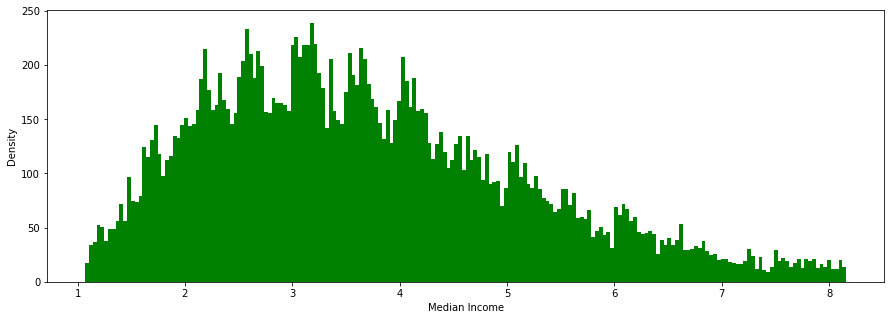

In [18]:
plt.figure(figsize=(15,5))
plt.xlabel("Median Income")
plt.ylabel("Density")
plt.hist(data.median_income,bins=200,color='g')
plt.show()

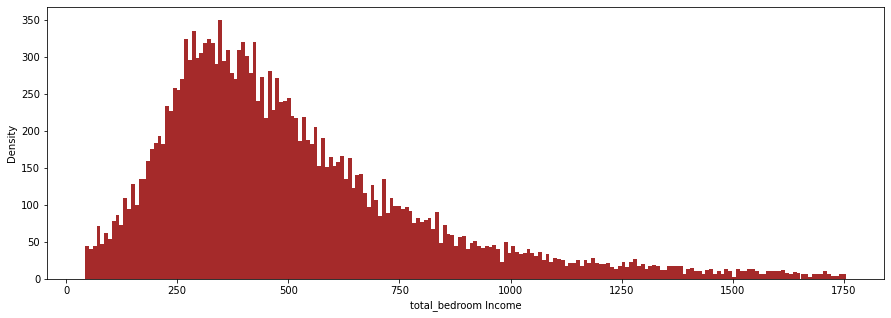

In [19]:
min_thresold, max_thresold = data.total_bedrooms.quantile([0.01, 0.98])
min_thresold, max_thresold


data= data[(data.total_bedrooms < max_thresold) & (data.total_bedrooms >min_thresold)]
data.describe()
data.shape
plt.figure(figsize=(15,5))
plt.xlabel("total_bedroom Income")
plt.ylabel("Density")
plt.hist(data.total_bedrooms,bins=200,color='brown')
plt.show()

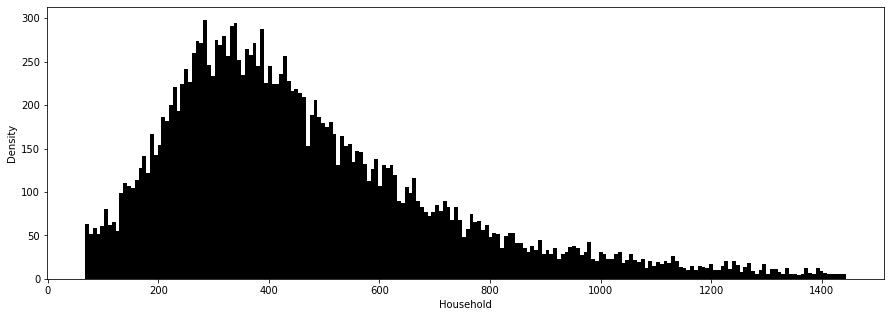

In [20]:
min_thresold, max_thresold = data.households.quantile([0.01, 0.99])
min_thresold, max_thresold
data[data.households < min_thresold]
data[data.households>max_thresold]

data= data[(data.households < max_thresold) & (data.households >min_thresold)]

plt.figure(figsize=(15,5))
plt.xlabel("Household")
plt.ylabel("Density")
plt.hist(data.households,bins=200,color='black')
plt.show()

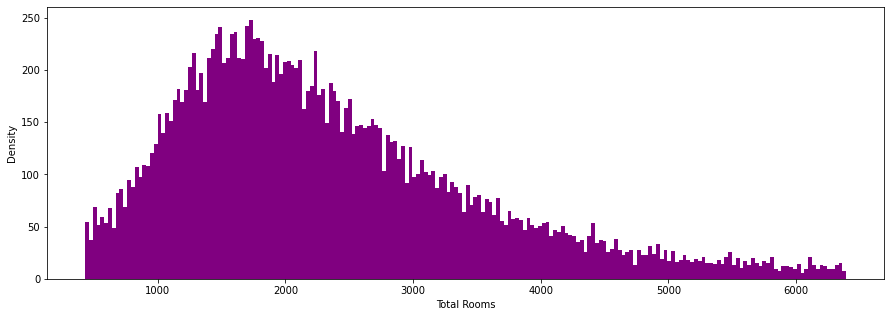

In [21]:
min_thresold, max_thresold = data.total_rooms.quantile([0.01, 0.98])
min_thresold, max_thresold
data[data.total_rooms < min_thresold]
data[data.total_rooms>max_thresold]

data= data[(data.total_rooms < max_thresold) & (data.total_rooms >min_thresold)]

plt.figure(figsize=(15,5))
plt.xlabel("Total Rooms")
plt.ylabel("Density")
plt.hist(data.total_rooms,bins=200,color='purple')
plt.show()

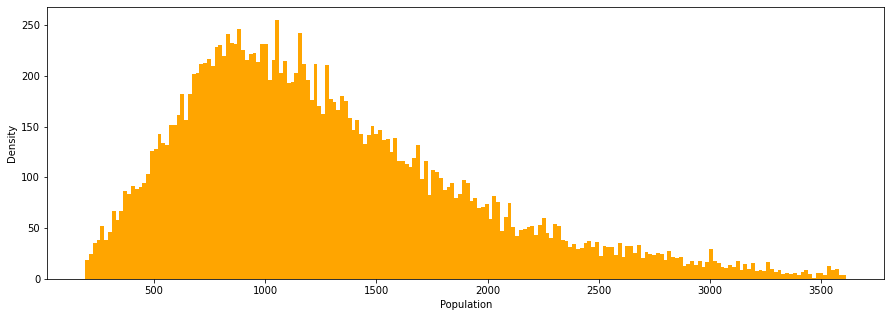

In [22]:
#data["total_bedrooms"]=data["total_bedrooms"].astype('int64')
min_thresold, max_thresold = data.population.quantile([0.001, 0.99])
data= data[(data.population < max_thresold) & (data.population >min_thresold)]

plt.figure(figsize=(15,5))
plt.xlabel("Population")
plt.ylabel("Density")
plt.hist(data.population,bins=200,color='orange')
plt.show()

In [23]:
median=data.total_bedrooms.median()
data.fillna(median,inplace=True)

In [24]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### Correlation

In [25]:
scat_mat=data.corr()
scat_mat["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.639460
total_rooms           0.166135
housing_median_age    0.141133
households            0.093714
total_bedrooms        0.073295
longitude            -0.043636
population           -0.066143
latitude             -0.152015
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

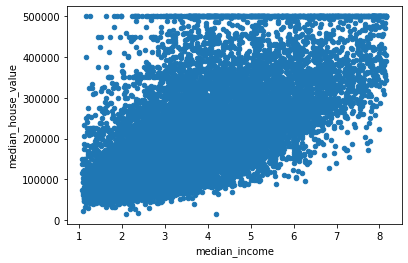

In [26]:
data.plot(kind='scatter',x='median_income',y='median_house_value')

### Latitude Longitude and Population relation

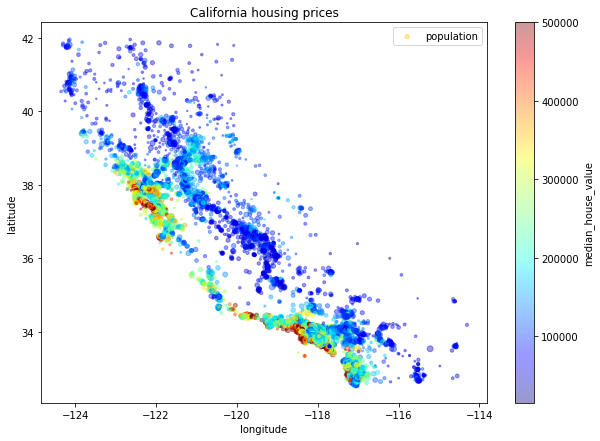

In [27]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=data["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title('California housing prices')
plt.legend()
plt.savefig("housing_prices_scatterplot.png")

### Lower lattitude and Higher longitude resulted more expensive in Housing Price

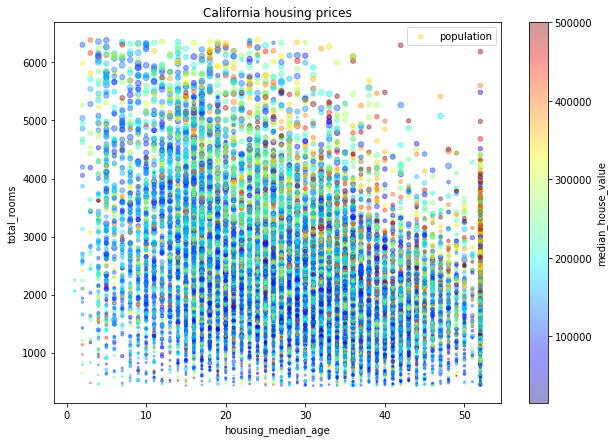

In [28]:
data.plot(kind="scatter", x="housing_median_age", y="total_rooms", alpha=0.4,
    s=data["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title('California housing prices')
plt.legend()
plt.savefig("housing_prices_scatterplot.png")

#### Obviously , Older the house , Lower the price and vice-versa

### Which Feature has given more importance ?

<AxesSubplot:title={'center':'Total Features '}, xlabel='Name of the Features', ylabel='Summation'>

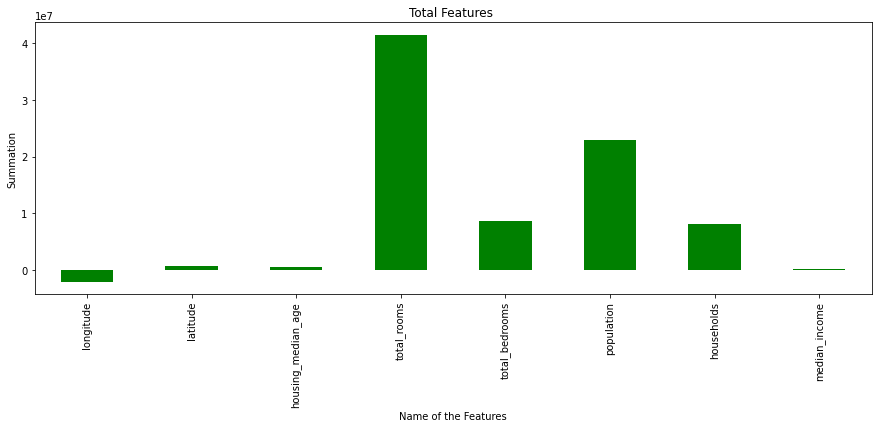

In [29]:
plt.figure(figsize=(15,5))
plt.title("Total Features ")
plt.xlabel("Name of the Features")
plt.ylabel("Summation")
data.iloc[:,:-2].sum().plot(kind='bar',color='green')

#### curve between population and median_house_value

<AxesSubplot:title={'center':'Population density'}, xlabel='Population', ylabel='Density'>

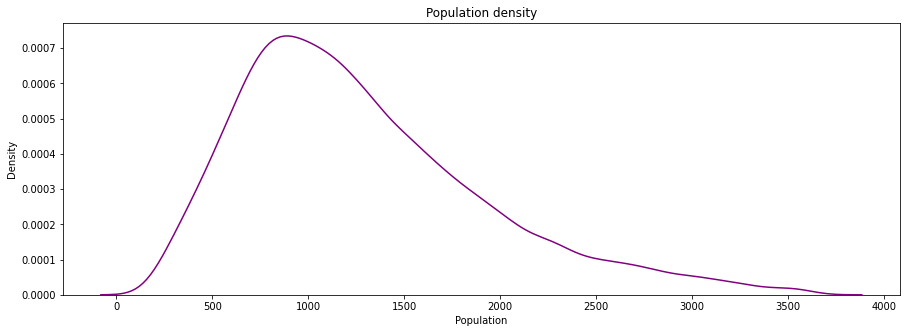

In [30]:
plt.figure(figsize=(15,5))
plt.title("Population density")
plt.xlabel("Population")
plt.ylabel("Density")

population=np.array(data["population"])

sns.kdeplot(population, shade=False,color='purple')

<AxesSubplot:title={'center':'Meidan House'}, xlabel='Price', ylabel='Density'>

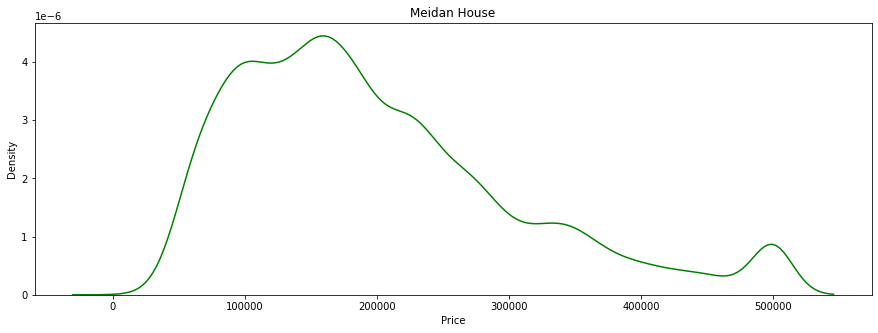

In [31]:
median_house=np.array(data["median_house_value"])
plt.figure(figsize=(15,5))
plt.title("Meidan House")
plt.xlabel("Price")
plt.ylabel("Density")

population=np.array(data["population"])

sns.kdeplot(median_house, shade=False,color='green')


<AxesSubplot:title={'center':'Housing Age'}, xlabel='Age', ylabel='Density'>

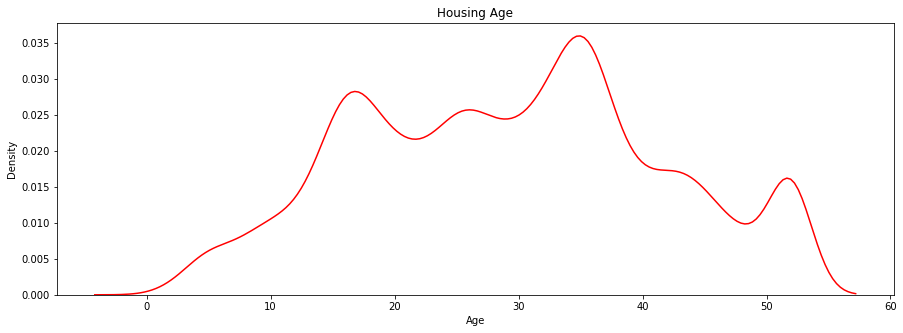

In [32]:
plt.figure(figsize=(15,5))
plt.title("Housing Age")
plt.xlabel("Age")
plt.ylabel("Density")

age=np.array(data["housing_median_age"])

sns.kdeplot(age, shade=False,color='red')

<AxesSubplot:ylabel='None'>

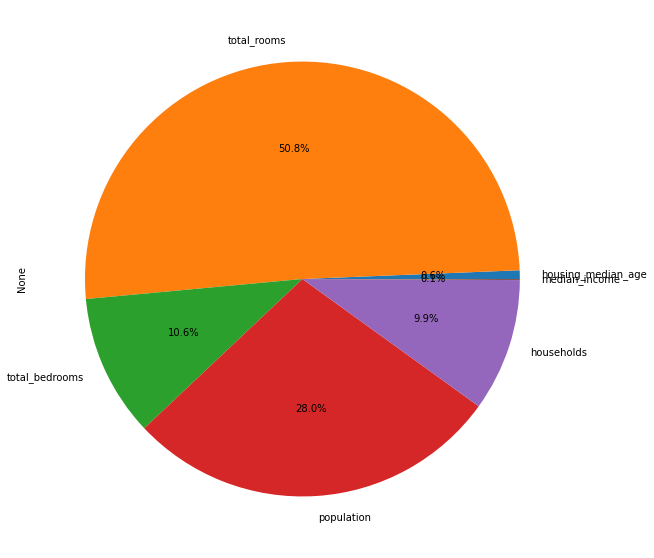

In [33]:
plt.figure(figsize=(25,10))

data.iloc[:,2:-2].sum().plot(kind='pie',autopct='%.1f%%')

#### Ocean_Proximity and Median House Value

In [34]:
ocean_Md=data["median_house_value"].groupby(data['ocean_proximity']).sum()
ocean_Md

ocean_proximity
<1H OCEAN     1.830110e+09
INLAND        6.805347e+08
ISLAND        1.902200e+06
NEAR BAY      5.006213e+08
NEAR OCEAN    5.555935e+08
Name: median_house_value, dtype: float64

<AxesSubplot:title={'center':'Ocean Proximity vs price'}, xlabel='ocean_proximity', ylabel='Median Housing Price'>

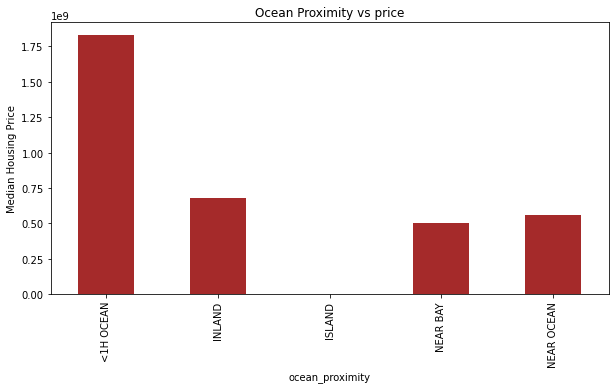

In [35]:

plt.figure(figsize=(10,5))
plt.title("Ocean Proximity vs price")
plt.ylabel("Median Housing Price")

ocean_Md.plot(kind='bar',color='brown')

### We can say , housing price is maximum at <1H Ocean

### Ocean Proximity and Population

In [36]:
ocean_p=data["population"].groupby(data['ocean_proximity']).sum()
ocean_p

ocean_proximity
<1H OCEAN     10778898.0
INLAND         6934720.0
ISLAND            3340.0
NEAR BAY       2271338.0
NEAR OCEAN     2915362.0
Name: population, dtype: float64

<AxesSubplot:title={'center':'Ocean Proximity vs Population'}, xlabel='ocean_proximity', ylabel='Population'>

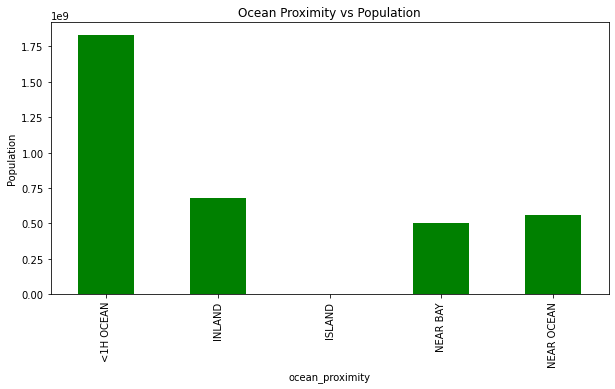

In [37]:

plt.figure(figsize=(10,5))
plt.title("Ocean Proximity vs Population")
plt.ylabel("Population")

ocean_Md.plot(kind='bar',color='green')

### Machine Learning part

In [38]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


### Label Encoder

In [39]:
from sklearn.preprocessing import LabelEncoder
ocean=data["ocean_proximity"].values

lENc=LabelEncoder()
encode=lENc.fit_transform(ocean)
data["ocean_proximity"]=encode


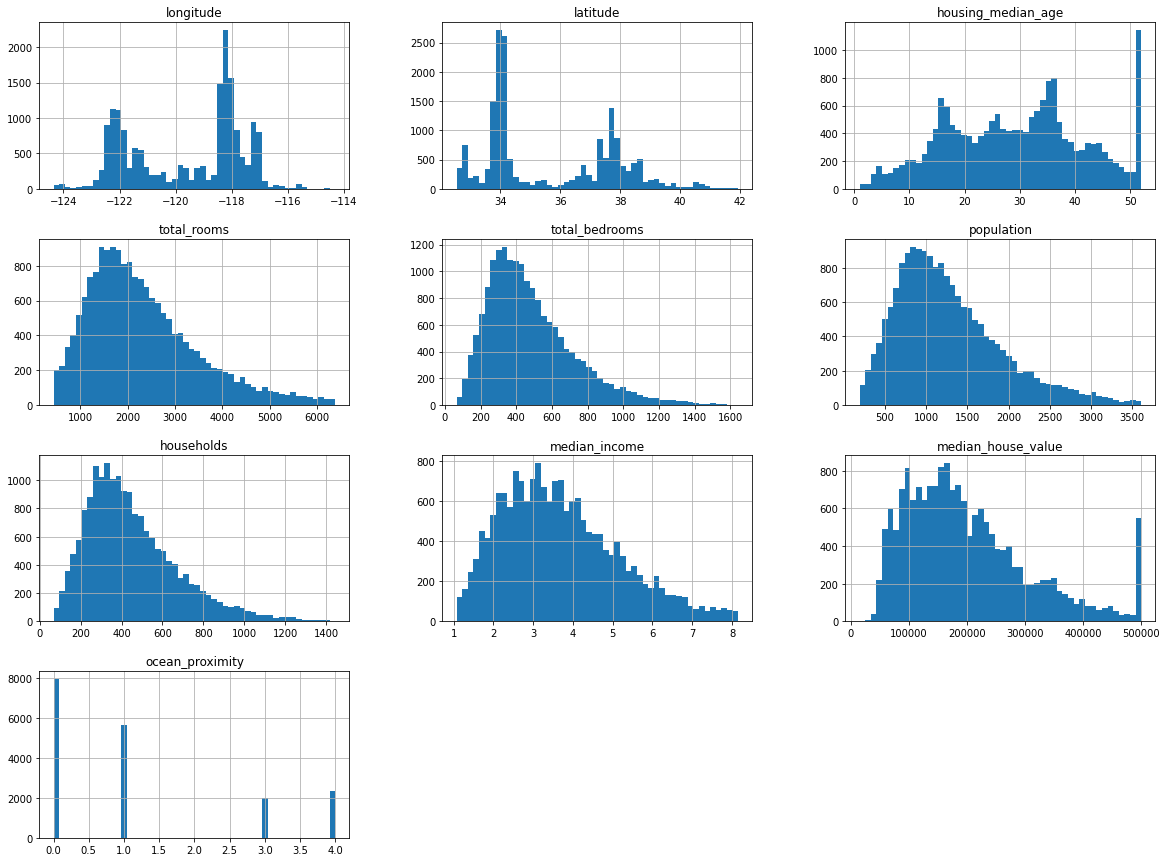

In [40]:
data.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots.png")
plt.show()

In [41]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,17875.000000,17875.000000,17875.000000,17875.000000,17875.000000,17875.000000,17875.000000,17875.000000,17875.000000,17875.000000
mean,-119.589526,35.650006,29.334154,2325.524755,483.564084,1281.323524,451.611077,3.691390,199650.981371,1.170238
std,1.999830,2.148686,12.264205,1164.298969,246.203210,642.463522,225.291943,1.474704,107386.810484,1.425345
min,-124.350000,32.540000,1.000000,431.000000,65.000000,192.000000,68.000000,1.071400,14999.000000,0.000000
25%,-121.800000,33.930000,19.000000,1475.000000,304.000000,810.000000,288.000000,2.566300,118100.000000,0.000000
50%,-118.500000,34.270000,30.000000,2086.000000,430.000000,1155.000000,406.000000,3.495000,176600.000000,1.000000
75%,-118.020000,37.720000,37.000000,2939.000000,611.000000,1631.500000,570.000000,4.601450,254550.000000,1.000000
max,-114.310000,41.950000,52.000000,6393.000000,1646.000000,3612.000000,1444.000000,8.159600,500001.000000,4.000000


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
train_set,test_set=train_test_split(data,test_size=0.2,random_state=2)


In [44]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=3)

for i,j in split.split(data,data["ocean_proximity"]):
    strata_train=data.iloc[i]
    strata_test=data.iloc[j]

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
my_pipe=Pipeline([
    ('std',StandardScaler()),
    ('imputer',SimpleImputer())
])

In [46]:
X_train=strata_train.drop("median_house_value",axis=1)
y_train=strata_train["median_house_value"].copy()
y_train


2718      93800.0
6412     408500.0
16635    317700.0
19222    240200.0
13294    130400.0
           ...   
5827     332400.0
493      500001.0
17991    234300.0
5873     229100.0
16024    344200.0
Name: median_house_value, Length: 14300, dtype: float64

In [47]:
X_test=strata_test.drop("median_house_value",axis=1)
y_test=strata_test["median_house_value"].copy()


In [48]:
X_train=my_pipe.fit_transform(X_train)

In [49]:
#model=LinearRegression().fit(X_train,y_train)
model=RandomForestRegressor().fit(X_train,y_train)
y_pred=model.predict(X_train)


In [50]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pred,y_train)
rmse=np.sqrt(mse)
rmse

17579.764407742347

### Prediction

In [51]:
y_preds=model.predict(X_test)


### Accuracy score

In [52]:
print("Train_score :",model.score(X_train,y_train))

print("Test Score :",model.score(X_test,y_preds))

Train_score : 0.9733026088133521
Test Score : 1.0


### It is very good result as we got 97% accuracy on training 